# Plotting and visualising

## Matplot 

Matplot is a python library that makes it easy to plot data. Look at the [examples](https://matplotlib.org/stable/plot_types/index.html)

First, we need to import the library:

In [ ]:
import matplotlib.pyplot as plt

Our data points are a basic list containing some numbers which are stored in a variable called ```values```:

In [ ]:
values = [0,10,15,90,0.2,24,10,0] # a list of random numbers
print(values)

[0, 10, 15, 90, 0.2, 24, 10, 0]


The variable values is passed as an argument to the plot() function which generates the plot. With ```ylabel()``` and ```xlabel()``` we can further customise the plot. ```plt.show()``` finally displays the plot:

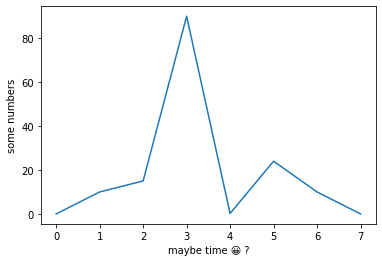

In [ ]:
plt.plot(values) # passing the list of values to the plot() function
plt.ylabel('some numbers') # labelling the y-axis 
plt.xlabel('maybe time 😀 ?') # labelling the y-axis 
plt.show() # finally displaying the plot

The ```plt``` class has lots of different functions. See the plot [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) for further parameters

Customise the plot by passing additional parameters to the curve:

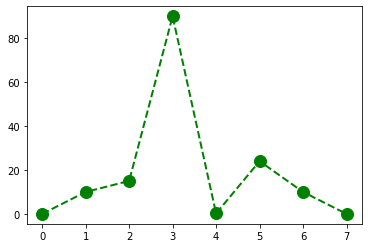

In [ ]:
#plt.plot(values) # passing the list of values to the plot() function
plt.plot(values,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.show()

The markers can be modified with the second argument. See list of available markers https://matplotlib.org/stable/api/markers_api.html and definitons for [colours](https://matplotlib.org/stable/tutorials/colors/colors.html)

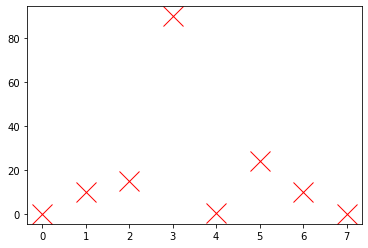

In [ ]:
plt.plot(values,'rx', markersize=20) # values for the markers are "ro", "r+", "bx" etc...
plt.show()

## Saving plot

Matplot outputs the visualisations directly in the jupyter notebook. You can also export the visuals as vector-based file format by calling the ```savefig``` function. The parameter inside is the filename including the folder path.

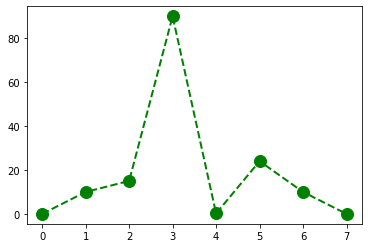

In [ ]:
plt.plot(values,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.savefig('sample_data/foo.png') # rasterized image
plt.savefig('sample_data/foo.pdf') # vector based format

## Changing sizes

The output size of the plot can be changed before exporting. The parameters inside ```figsize=(WIDTH,HEIGHT)``` define the size of the graph. Adapt it to your needs:

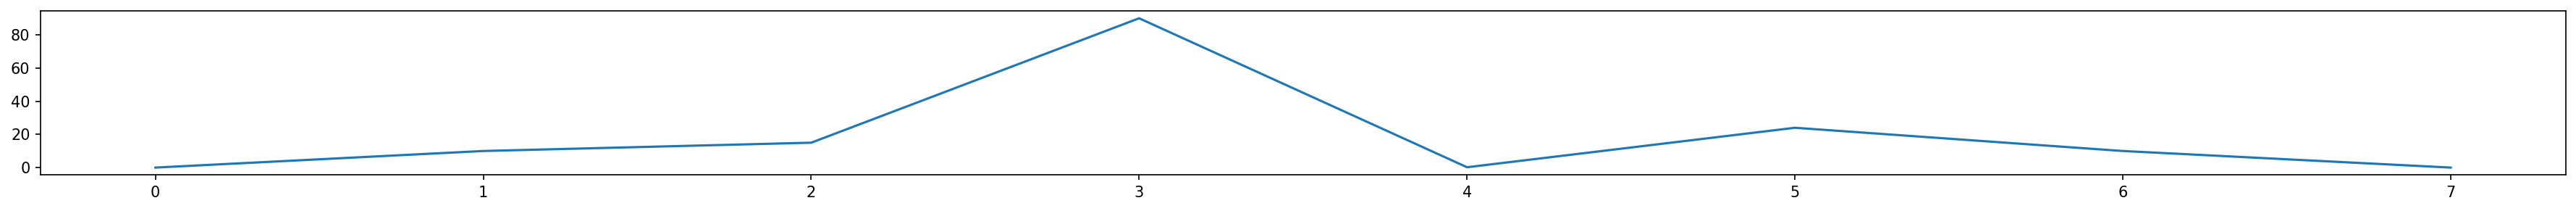

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(30,2), dpi=150)
plt.plot(values)

## Mapping coordinates on a map

The module mplleaflet turns any matplot plot into Leaflet web map. Here's the [link](https://github.com/jwass/mplleaflet). In Google Colab you might have to install this additional module. Execute following line to install this add-on:

In [ ]:
!pip install mplleaflet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-py3-none-any.whl size=28582 sha256=a51a48638565ea74490fb9e5ff948a1137636edb801b2ed22a46a4fbd9057be2
  Stored in directory: /root/.cache/pip/wheels/6b/f5/21/cdd12e476182b4b0b98326cdb9efa02ddbd5d87ca5de051c84
Successfully built mplleaflet


Importing the new add-on and pandas

In [ ]:
import mplleaflet
import pandas as pd

A CSV (comma-seperated-value) file with geo-locations will be read and stored as a pandas dataframe. The CSV file was generated from a query to the xeno-canto archive:

````
https://www.xeno-canto.org/api/2/recordings?query=cnt:switzerland loc:basel
````

In [ ]:
df = pd.read_csv("./sample_data/output.csv")
df.head()

,Unnamed: 0,lat,lng,rmk
0,0,47.5734,7.5767,call from a nest
1,1,47.5401,7.5965,NaN
2,2,47.4312,7.5357,NaN
3,3,47.5399,7.5964,NaN
4,5,47.5243,7.5634,NaN


The geo-locations can be accessed through calling their column-name. Be careful by using the square brackets [ ]:

In [ ]:
print(df["lat"])

0      47.5734
1      47.5401
2      47.4312
3      47.5399
4      47.5243
        ...   
144    47.5396
145    47.5396
146    47.5396
147    47.5399
148    47.5396
Name: lat, Length: 149, dtype: float64


Next two steps involve in preparing the matplot figure and plot the two columns from our pandas dataframe. The latitude and longitude are passed into the plot function. By default, matplot tries to draw lines, hence it will connect all individual locations. Try the other other option which is in the comments:

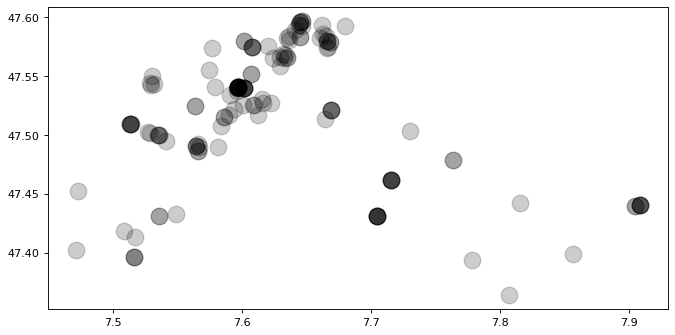

In [ ]:
fig = plt.figure(figsize=(10,5), dpi=80)
#plt.plot(df["lng"],df["lat"])

# use different styling
plt.plot(df["lng"],df["lat"],"ko",markersize=15,alpha=.2)

In [ ]:
mplleaflet.display(fig=fig)

/Users/gordan.savicic/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


The generated map consists of an interactive HTML map that can be exported and saved as HTML page. Further, the tile layer (Openstreetmap by default) can be changed with other tile layer providers. See here some examples of other [tileLayer providers](https://leaflet-extras.github.io/leaflet-providers/preview/).

In [ ]:
tile_layer_url = "https://stamen-tiles-{s}.a.ssl.fastly.net/toner-lite/{z}/{x}/{y}.png"
#tile_layer_url = "https://stamen-tiles-{s}.a.ssl.fastly.net/toner/{z}/{x}/{y}.png"
#tile_layer_url = "https://stamen-tiles-{s}.a.ssl.fastly.net/watercolor/{z}/{x}/{y}.png"
#tile_layer_url = "https://wmts.geo.admin.ch/1.0.0/ch.swisstopo.pixelkarte-farbe/default/current/3857/{z}/{x}/{y}.jpeg"
#tile_layer_url = "https://stamen-tiles-{s}.a.ssl.fastly.net/terrain-labels/{z}/{x}/{y}.png"

Instead of **display()** we are using the **show()** function by mppleaflet which will generate a html file called map.html in the sample_data folder with the new map tile layer:

In [ ]:
mplleaflet.show(fig=fig,path="./sample_data/map.html",tiles=[tile_layer_url,"Stamen"])

### Render scatterplot with additional information

With the annotate function one can render additional information to the graph. In the CSV file there is a third column, called __rmk__. 

) missing from current font.da3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Glyph 13 (
  import sys
/Users/gordan.savicic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Glyph 8297 (\N{POP DIRECTIONAL ISOLATE}) missing from current font.
  import sys
) missing from current font.da3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Glyph 13 (
  import sys
/Users/gordan.savicic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Glyph 8297 (\N{POP DIRECTIONAL ISOLATE}) missing from current font.
  import sys
) missing from current font.da3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gordan.savicic/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8297 (\N{POP DIRECTIONAL ISOLATE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


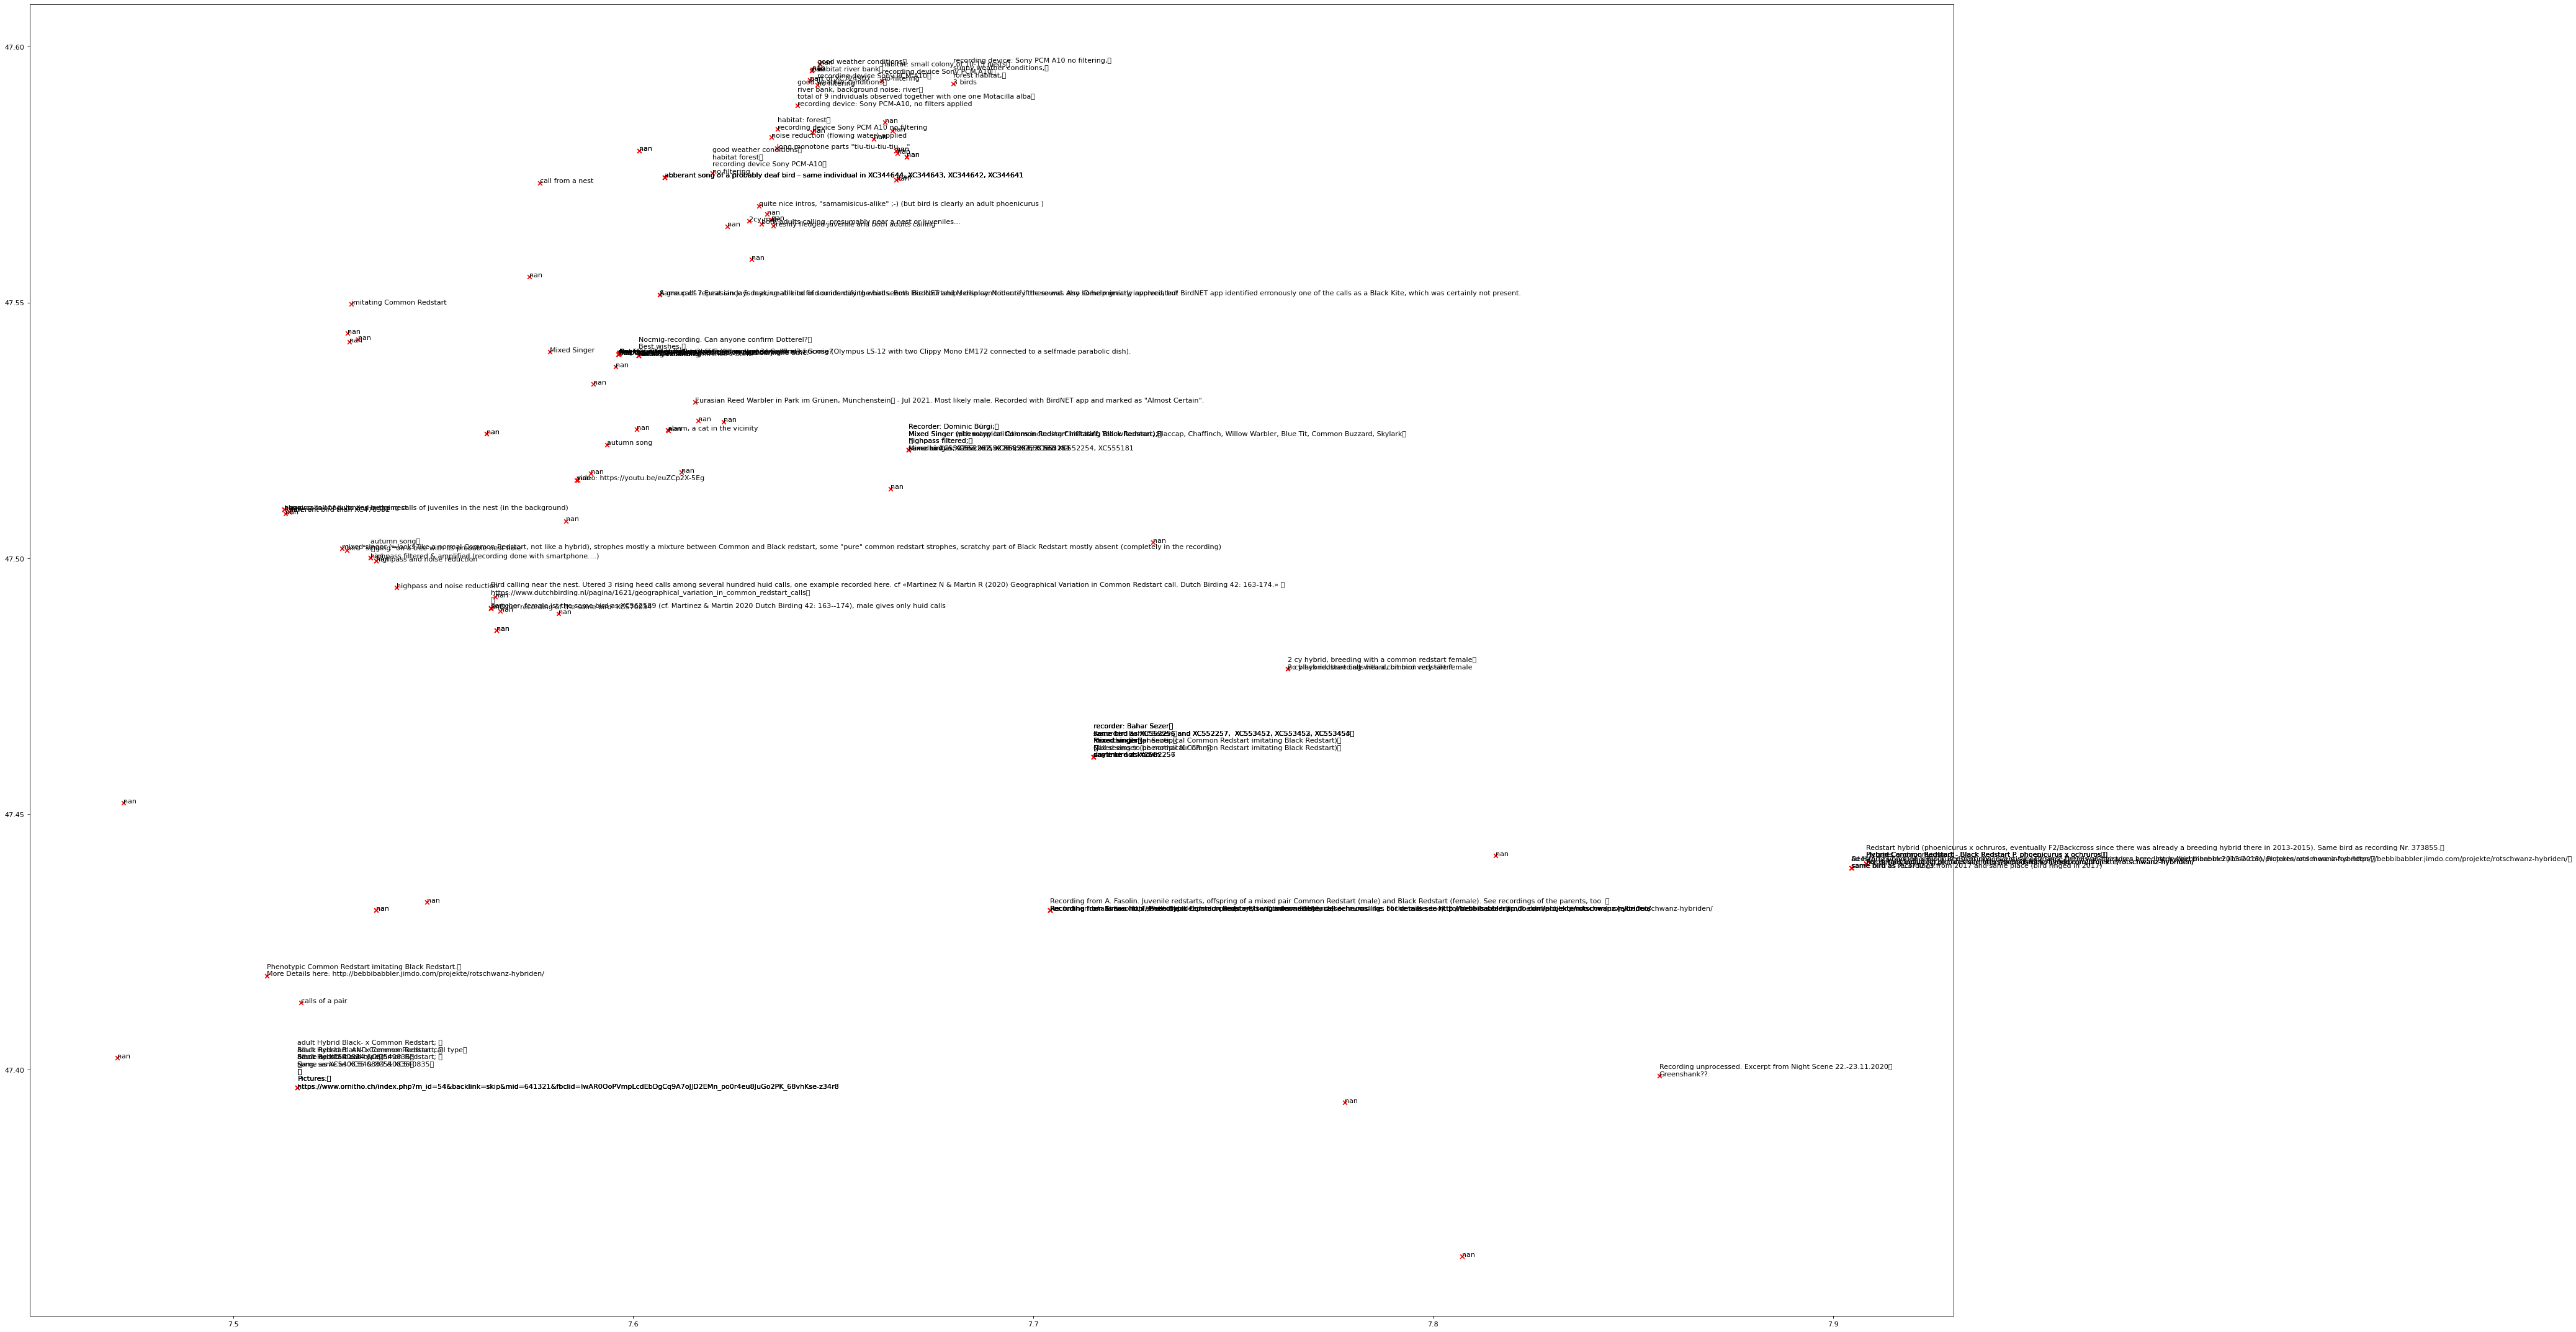

In [ ]:
fig = plt.figure(figsize=(50,35), dpi=80)
plt.scatter(df['lng'],df['lat'], c='red', marker='x')
for i in range(len(df["rmk"])):
    x = df['lng'][i]
    y = df['lat'][i]
    plt.annotate(df['rmk'][i],(x,y))
    
# save to output file    
#plt.savefig('sample_data/map.pdf') # vector based format

## Render a track from Animal Tracker onto a map

In the previous jupyerr notebook a track file with geocoordinates has been saved to the sample_data folder. Its path might look like ```sample_data/track-53e64761-422f-4f47-978c-a3492f985825.json```

First, import the data into a pandas dataframe and interpret it:

In [ ]:
import pandas as pd
import json

The next command will download a track file and save it into the sample_data folder. If you want to visualise your own track you'll have to upload it manually

In [ ]:
!wget https://raw.githubusercontent.com/fleshgordo/cocreate22/main/sample_data/track-53e64761-422f-4f47-978c-a3492f985825.json -P sample_data

--2022-09-17 20:57:54--  https://raw.githubusercontent.com/fleshgordo/cocreate22/main/sample_data/track-53e64761-422f-4f47-978c-a3492f985825.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34582 (34K) [text/plain]
Saving to: ‘sample_data/track-53e64761-422f-4f47-978c-a3492f985825.json’

track-53e64761-422f 100%[===================>]  33.77K  --.-KB/s    in 0.004s  

2022-09-17 20:57:55 (7.54 MB/s) - ‘sample_data/track-53e64761-422f-4f47-978c-a3492f985825.json’ saved [34582/34582]



In [ ]:
# specify file name to load
filename = "./sample_data/track-53e64761-422f-4f47-978c-a3492f985825.json"

# open file and read json data
with open(filename) as json_data:
    data = json.load(json_data)

# create dataframe
df = pd.json_normalize(data["data"])
df

,id,type,attributes.id,attributes.track_type,attributes.step_resolution,attributes.seconds_per_step,attributes.locations,attributes.title.de,attributes.title.en,attributes.title.ru,relationships.animal.data.id,relationships.animal.data.type
0,187c46b6-c697-49d7-9203-b0b1036af756,track,187c46b6-c697-49d7-9203-b0b1036af756,two_weeks,day,2,"[{'longitude': -3.6607965, 'latitude': 38.8589...",2 Wochen,2 Weeks,2 недели,53e64761-422f-4f47-978c-a3492f985825,animal
1,d9478b53-c9a7-4e26-b424-9e5aa59498f8,track,d9478b53-c9a7-4e26-b424-9e5aa59498f8,year,month,2,"[{'longitude': 8.9657004, 'latitude': 47.81663...",12 Monate,12 Months,12 месяцев,53e64761-422f-4f47-978c-a3492f985825,animal


There are only two rows in the dataset. The locations are apparently in the column ```attributes.locations```


In [ ]:
df["attributes.locations"][0] # showing the geo-locations from past two weeks  (step resolution day)

[{'longitude': -3.6607965,
  'latitude': 38.8589793,
  'timestamp': '2022-09-03T17:20:13.000+02:00'},
 {'longitude': -3.66101,
  'latitude': 38.8590896,
  'timestamp': '2022-09-03T18:25:08.000+02:00'},
 {'longitude': -3.6609236,
  'latitude': 38.8589734,
  'timestamp': '2022-09-03T19:25:08.000+02:00'},
 {'longitude': -3.6600919,
  'latitude': 38.8557543,
  'timestamp': '2022-09-03T20:25:23.000+02:00'},
 {'longitude': -3.6549052,
  'latitude': 38.8570484,
  'timestamp': '2022-09-03T21:30:12.000+02:00'},
 {'longitude': -3.6549147,
  'latitude': 38.8570783,
  'timestamp': '2022-09-04T04:05:41.000+02:00'},
 {'longitude': -3.6549291,
  'latitude': 38.8570615,
  'timestamp': '2022-09-04T05:10:08.000+02:00'},
 {'longitude': -3.6549256,
  'latitude': 38.8571014,
  'timestamp': '2022-09-04T06:10:09.000+02:00'},
 {'longitude': -3.654878,
  'latitude': 38.8570805,
  'timestamp': '2022-09-04T07:10:13.000+02:00'},
 {'longitude': -3.6600782,
  'latitude': 38.8556689,
  'timestamp': '2022-09-04T08:15

In [ ]:
df["attributes.locations"][1] # showing the geo-locations from last year (step resolution month)

[{'longitude': 8.9657004,
  'latitude': 47.8166397,
  'timestamp': '2022-06-09T15:31:23.000+02:00'},
 {'longitude': 8.9676323,
  'latitude': 47.8137207,
  'timestamp': '2022-06-10T16:00:12.000+02:00'},
 {'longitude': 8.9679708,
  'latitude': 47.8138366,
  'timestamp': '2022-06-11T16:15:10.000+02:00'},
 {'longitude': 8.9679934,
  'latitude': 47.8137077,
  'timestamp': '2022-06-12T16:15:23.000+02:00'},
 {'longitude': 8.9679441,
  'latitude': 47.8137092,
  'timestamp': '2022-06-13T16:30:38.000+02:00'},
 {'longitude': 8.9679113,
  'latitude': 47.8137135,
  'timestamp': '2022-06-14T16:45:11.000+02:00'},
 {'longitude': 8.9679135,
  'latitude': 47.8136816,
  'timestamp': '2022-06-15T17:00:13.000+02:00'},
 {'longitude': 8.9679277,
  'latitude': 47.8136887,
  'timestamp': '2022-06-16T17:00:25.000+02:00'},
 {'longitude': 8.9679541,
  'latitude': 47.813713,
  'timestamp': '2022-06-17T17:00:26.000+02:00'},
 {'longitude': 8.9679805,
  'latitude': 47.8137955,
  'timestamp': '2022-06-18T17:00:54.000+

We only want the two column keys "longitude" and "latitude" to plot onto the matplot diagram. By looking at the data structure, it becomes clear that the locations are a list consisting of so-called [dictionaries](https://realpython.com/python-dicts/). The easist solution in this case to create a new pandas Dataframe from the list of GPS points:

In [ ]:
df2w = pd.DataFrame.from_dict(df["attributes.locations"][0]) # create new dataframe and store it in df2w
df2w

,longitude,latitude,timestamp
0,-3.660797,38.858979,2022-09-03T17:20:13.000+02:00
1,-3.661010,38.859090,2022-09-03T18:25:08.000+02:00
2,-3.660924,38.858973,2022-09-03T19:25:08.000+02:00
3,-3.660092,38.855754,2022-09-03T20:25:23.000+02:00
4,-3.654905,38.857048,2022-09-03T21:30:12.000+02:00
...,...,...,...
244,-5.876017,37.222724,2022-09-17T12:20:08.000+02:00
245,-5.875773,37.223001,2022-09-17T13:20:08.000+02:00
246,-5.873628,37.224579,2022-09-17T14:20:08.000+02:00
247,-5.875701,37.223108,2022-09-17T15:20:08.000+02:00


As in the mppleaflet example above, we create first a figure with specific size and then plot both columns "longitude" and "latitude" to the matplot:

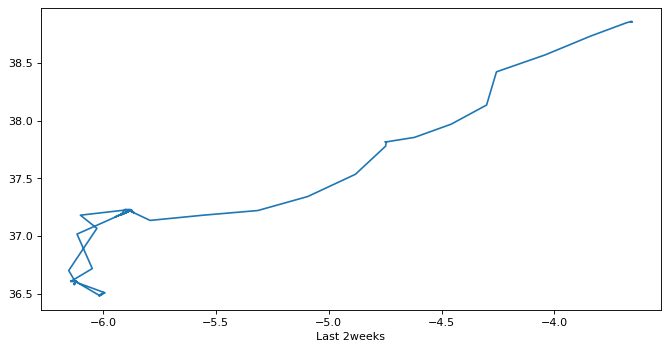

In [ ]:
fig = plt.figure(figsize=(10,5), dpi=80)
plt.xlabel("Last 2weeks")
plt.plot(df2w["longitude"],df2w["latitude"])

Calling the mplleaflet function by passing the figure as parameter should open the route of the last 2weeks onto an interactive web 

In [ ]:
mplleaflet.display(fig=fig)

/usr/local/lib/python3.7/dist-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Exercise time

Try the same for the GPS points from the past 12months and plot it onto the map

In [ ]:
df1y = pd.DataFrame.from_dict(df["attributes.locations"][1]) # create new dataframe and store it in df2w
fig = plt.figure(figsize=(10,5), dpi=80)
plt.xlabel("Last Year")
plt.plot(df1y["longitude"],df1y["latitude"])
mplleaflet.display(fig=fig)